# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit #cross_validation

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


/Users/parksoy/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/parksoy/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
features.head(3)

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8


In [3]:
prices.head(3)

0    504000.0
1    453600.0
2    728700.0
Name: MEDV, dtype: float64

In [4]:
prices.describe() #Reviewer mentioned this p

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

In [5]:
#REVIEWER1 suggests to use numpy for std.

print "prices.std():",prices.std() #Reviewer mentioned pandas std uses degree if freedom of 1.
print "prices.std(ddof =0):",prices.std(ddof =0)
print "prices.std(ddof =1):",prices.std(ddof =1) 
print "USE df=0: np.std(prices):", np.std(prices) #Reviewer suggests to use numpy std which uses degree of freedom 0. 


prices.std(): 165340.277653
prices.std(ddof =0): 165171.131544
prices.std(ddof =1): 165340.277653
USE df=0: np.std(prices): 165171.131544


In [6]:
#REVIEWER3 suggests to use numpy for all statistics. 

# TODO: Minimum price of the data
minimum_price = np.min(prices)
#minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
#maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
#mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
#median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
#std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Original Answer: **

An increase in the 'RM' value would lead to an increase in the value of 'MEDV'.

An increase in the 'PTRATIO' or 'LSTAT' value would lead to a decrease in the value of 'MEDV.

**Reviewer3 feedback:
Student correctly justifies how each feature correlates with an increase or decrease in the target variable.**

**Please note that as per requirement, we would like to see the relevant justification.**
**The relevant reason for the correlations identified must be clearly provided in your report**

**Revised answer:**

I plotted to see correlation between 'RM' and 'MEDV'in the following cell: plot (4,1) 'RM' vs.'MEDV'shows positive correlation. An increase in the 'RM' value leads to an increase in the value of 'MEDV'.

I plotted to see correlation between 'PTRATIO' and 'MEDV' in the following cell: plot (4,3) 'PTRATIO' vs.'MEDV'shows negative correlation. An increase in the 'PTRATIO' value leads to decrease in the value of 'MEDV'.

I plotted to see correlation between 'LSTAT' and 'MEDV' in the following cell: plot (4,2) 'LSTAT' vs.'MEDV'shows negative correlation. An increase in the 'LSTAT' value leads to decrease in the value of 'MEDV'.


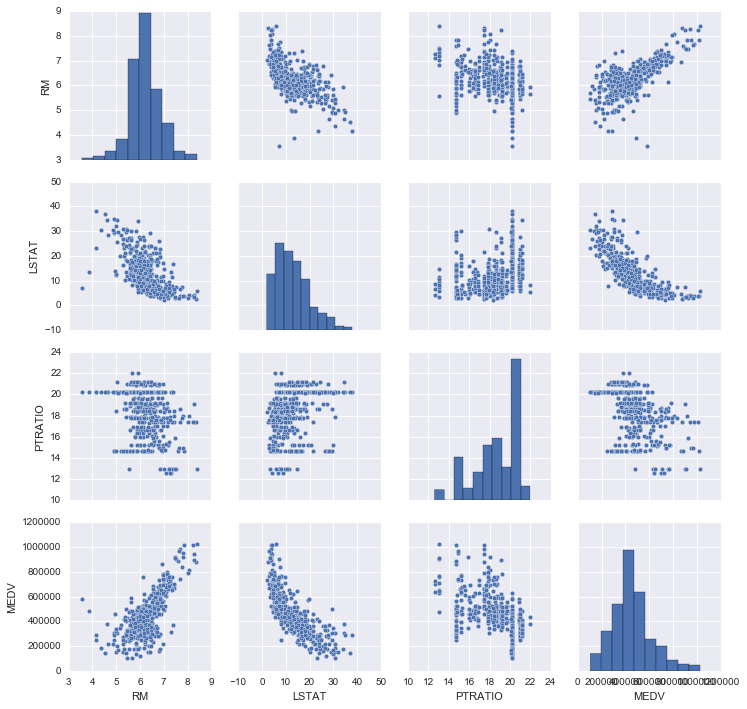

In [7]:

import seaborn as sns
sns.pairplot(data=data, dropna=True) #This works with and without actial names of axis sns.pairplot(data=data[["RM","LSTAT","PTRATIO","MEDV"]], dropna=True) 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

**Q** *Would you consider this model to have successfully captured the variation of the target variable? Why or why not?*

I consider this model to have successfully captured the variation of the target variable because R^2 value is close to 1. 

*reviewer suggests to elaborate on reasoning:

Based on reference: 
http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination

    An R2 of 0 means that the dependent variable cannot be predicted from the independent variable.
    An R2 of 1 means the dependent variable can be predicted without error from the independent variable.

Since R2 is almost close to 1, this means, the model(prediction) captured the target variable(actual) predictably, in other words, variation of target(actual) is well captured by the model. 

**Reviewer's feedback:**

**Student provides a valid reason for why a dataset is split into training and testing subsets for a model. Training and testing split is correctly implemented in code.**

**I would like you to reformulate your answer with a little more clarity, especially about the concepts of bias and variance. It is also important to know well the concept of overfitting and to question how the adaptation of the classifier the specific characteristics of the training set can negatively influence the model. How can we avoid this by dividing the total set of data into two subgroups?**

**Revised answer:**
If the dataset is not divided to training and testing subsets for building a model, there is no way to validate the model that has high bias or high variance issue. The classifier of the model that is made by the whole dataset may be overfitted to the whole dataset, so the classifier can give high variance for new sets of dataset. It is important to divide the dataset to training and testing subsets, so a model that is built on training set is validated on the training set whether it doesn't suffer high bias or high variance(in other words, variation of the target variable is well captured by a model both training and test set). 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

If the test set is the same as training set, the fitting will be good, but actual cases that are different from the trainig case may not be well predicted if the model was overfitting onto the the training set/test set. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

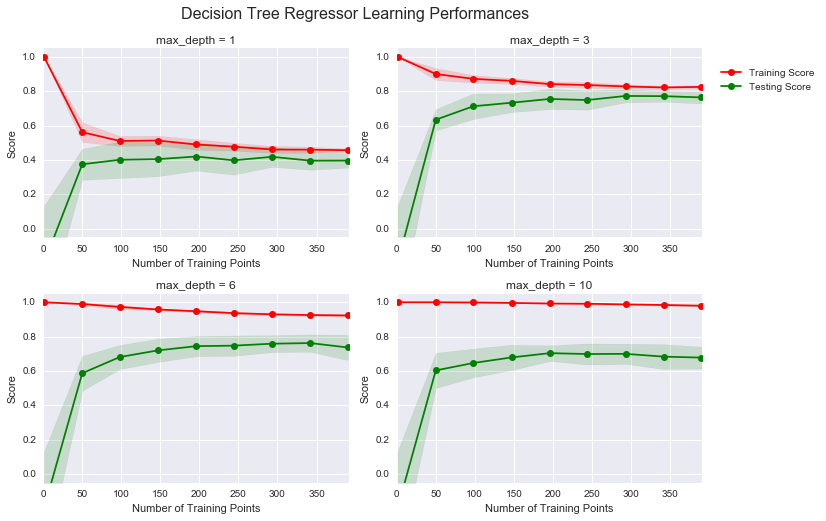

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

*Choose one of the graphs above and state the maximum depth for the model. max_Depth=3*

**Q1** *What happens to the score of the training curve as more training points are added?*

Training score decreases slowly with number of training points, and it levels off at ~0.81. 



**Q2** *What about the testing curve?* 

Testing score increases very fast with number of training points, and it levels off at ~0.78. 

**Q3** *Would having more training points benefit the model?*

Yes, upto 150 points, but beyond that, it levels off. 

**Q4** *Are the learning curves converging to particular scores?*

Training score converges at ~0.81. 
Testing score converges at ~0.78. 


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

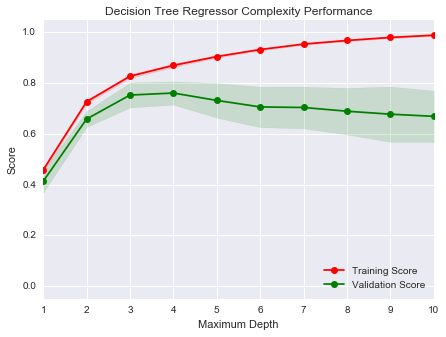

In [12]:
vs.ModelComplexity(X_train, y_train)

In [13]:
X_train.head(3)


,RM,LSTAT,PTRATIO
325,5.869,9.80,20.2
140,6.174,24.16,21.2
433,6.749,17.44,20.2


In [14]:
X_train.shape[0]

391

In [15]:
X_train.describe()

,RM,LSTAT,PTRATIO
count,391.000000,391.000000,391.000000
mean,6.257668,12.836598,18.441432
std,0.674118,7.127752,2.181947
min,3.561000,1.980000,12.600000
25%,5.886000,7.195000,17.000000
50%,6.195000,11.410000,18.900000
75%,6.630000,16.920000,20.200000
max,8.398000,37.970000,22.000000


In [16]:
y_train.describe()

count    3.910000e+02
mean     4.617583e+05
std      1.685501e+05
min      1.050000e+05
25%      3.559500e+05
50%      4.452000e+05
75%      5.250000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

**Q1** *When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?*

Low score in training learning curve implies high bias.  

**Q2** *How about when the model is trained with a maximum depth of 10?*

Giving too much of depth as 10 led overfitting, or, high variance, therefore, poor score in testing set. 

**Q3** *What visual cues in the graph justify your conclusions?*

I would give max depth 3 or 4. That is the highest score in validation set, without suffering too much of uncertainty or score in validation set. 

**Q4** *How do you know when a model is suffering from high bias or high variance?*

High bias: Training score is low and testing score is low as well. 

High Variance: Training score is high while testing score is low. 

**Reviewers feedback:
You have successfully identified if the levels of max_depth 1 and 10 suffer from high bias or variance. However, I missed how you came to that conclusion through the graph of complexity curves.

**TIP: For example, although the curves approach a lot during depth 1 level, the downward error rate for the training set indicates that the model suffers from a high bias rate, right? Try to base your answer more by using the graph and the relationship of trio complexity x bias x variance.**

**Revised answer:**
Two metrics of the complexity graph can be used for interpretation of high bias or high variance. 

The **shaded regions** of both the complexity curves denote the uncertainty in those curves. 
Training set has less uncertainty as depth of tree goes deeper. This implies the model is suffering high bias at low max_depth while bias decreases with max_depth, in other words, it gets well/overfitted.

**Score** for the validation set decreases as the max_depth decreases at very high max_depth, while score for training set continuously increases. This means traing set is getting overfitted, and the validation set suffers high variance.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

max_depth=3. Testing score can saturate at the highest score among all experiement set, and it will take relatively less time or computatively less expensive than going upto max_depth=10. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search technique allows to try many combination of many parameters in systematical/grided scanning manner. Many different combination of parameters can be fed as an input to algorithm and score can be calculated so we can choose the combination of parameters that gives the highest score.  

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

* Reviewer suggests to elaborate more especially on how k-fold CV works, so I modified the answers in the following:
* Based on the reference:
    http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


**Q1:** *What is the k-fold cross-validation training technique? 

Original answer: 
    Dataset is divided by k and some portion is assigned as training set, the rest is assigned as validation set. 

Elaborated based on reference: 

        Q: How the data is divided?
        A: Provides train/test **indices** to split data in train/test sets.
        Q: How are the divided data used in each of the k folds?
        A: Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
        Q: How are the results from k fold combined?
        A: Results of score from k fold training-validation are averaged out. 
     

**Q2:** *What benefit does this technique (advantage over normal hold out method) provide for grid search when optimizing a model?*

Original answer: Many combination of parts of dataset can be tried to train and validate in many different ways for the highest score along with the grid search. This only helps to best utilize the limited dataset to avoid overfitting and validate the algorithm/parameters that give the highest score. 

Elaborated based on reference: 
       
        Q: Discuss the benefit of k-fold CV, especially its advantage over normal hold out method.
        A: Normal hold out method only train and validate once for the entire set, so if there is any unseen/new dataset, there is a chance for poor performance. 


**Q2:** *Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?*

Grid Search without cross-validation can give the high score in one big training-test dataset, but there is no way to validate whether the optimized algorithm/parameters are going to give as high score in the new/unknown dataset as in training-test dataset. 


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [17]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    ##The ShuffleSplit() implementation below will create 10 ('n_iter') shuffled sets, 
    ##and for each shuffle, 20% ('test_size') of the data will be used as the validation set. 
    cv_sets = ShuffleSplit(n_splits= 10, test_size = 0.20, random_state = 0) #train_size=X.shape[0],, n_iter 

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth':[1,10]} #Original wrong answer
    params = {'max_depth':range(1,11)} #Revised answer

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer'
    
 
    
    scoring_fnc = make_scorer(performance_metric) #, beta=2
    
    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, cv=cv_sets, scoring=scoring_fnc)

  
        
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [18]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

**Q**What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?

Original answer: 

    max_depth 10 is suggested as optimal. In question 6, max_depth=3 was intuitively picked because testing score can saturate at the highest score among all experiement set, and it will take relatively less time or computatively less expensive than going upto max_depth=10. However, in just training score point of view, max_depth=10 is best optimal point. 

Revised answer after fixing range of max_depth from 1,10 to 1:10
 
    max_depth 4 is suggested as optimal. In question 6, max_depth=3 was intuitively picked because testing score can saturate at the highest score among all experiement set. Optimal model and what I choose in Question 6 are close each other. 



### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [19]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


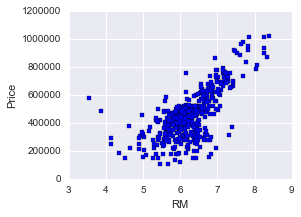

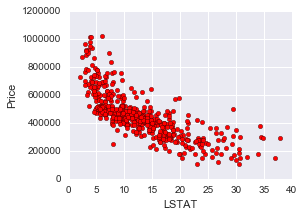

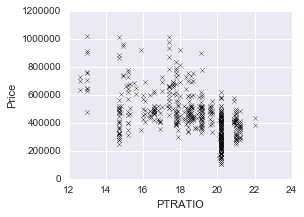

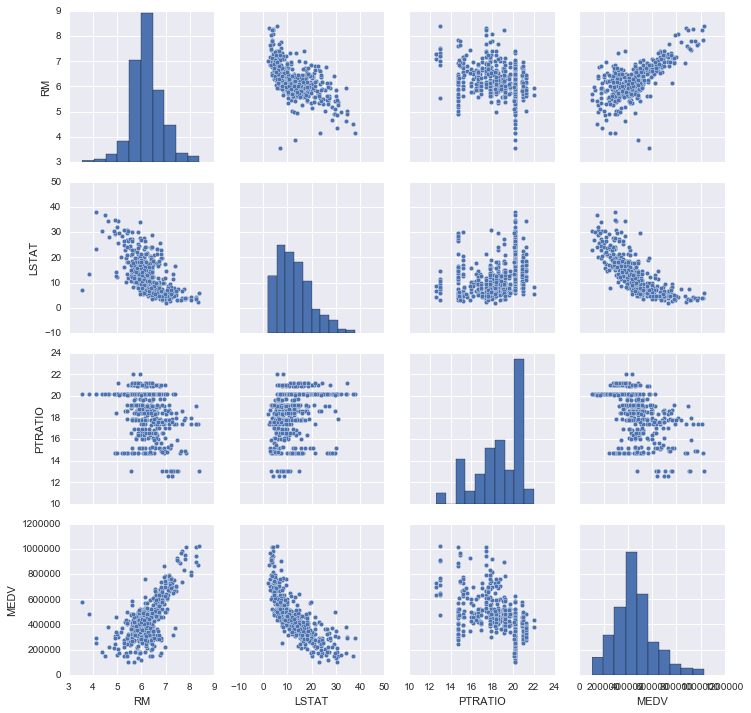

In [20]:
import matplotlib.pyplot as plt
import visuals as vs
%matplotlib inline

plt.figure(figsize=(4,3))
plt.scatter(features['RM'], data['MEDV'],c='b', marker="s", label='RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.grid(True)


plt.figure(figsize=(4,3))
plt.scatter(features['LSTAT'], data['MEDV'],c='r', marker="o", label='LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.grid(True)

plt.figure(figsize=(4,3))
plt.scatter(features['PTRATIO'], data['MEDV'],c='k', marker="x", label='PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('Price')
plt.grid(True)

import seaborn as sns
sns.pairplot(data=data, dropna=True) #This works with and without actial names of axis sns.pairplot(data=data[["RM","LSTAT","PTRATIO","MEDV"]], dropna=True) 

In [25]:

# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3
client_data

[[5, 17, 15], [4, 32, 22], [8, 3, 12]]

In [28]:
reg.predict(client_data)

array([ 403025.        ,  237478.72340426,  931636.36363636])

In [26]:
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [29]:
np.transpose(client_data)

array([[ 5,  4,  8],
       [17, 32,  3],
       [15, 22, 12]])

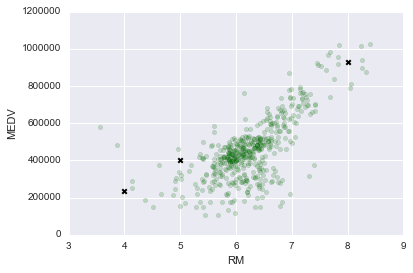

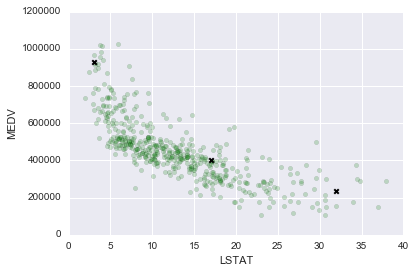

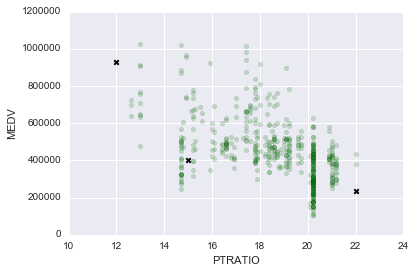

In [39]:
#Reviewer4 showed how to plot the client data against the dataset. 

from matplotlib import pyplot as plt 

clients=np.transpose(client_data)
pred=reg.predict(client_data)
for i, feat in enumerate (['RM','LSTAT','PTRATIO']):
    plt.scatter(features[feat],prices,alpha=0.2,c='green')
    plt.scatter(clients[i],pred,color='black',marker='x',linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()
    

**Answer: **

**Q** What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features? Use the statistics you calculated in the Data Exploration section to help justify your response.

**Reviewer suggested to elaborate on the justification for each of the three predictions after updating the result with optimum max depth. You can look at the features for each client, and compare each prediction against the statistics obtained earlier (e.g. min, max, mean/median). We may notice from the features that these three clients' selling prices actually represent three categories.
**


Original answer: 
    All three clients' predicted values are pretty resasonable when I even just eyeball the corresponding price value to each feature in each scatter plot. All three features seems to be well captured in the prediction. 

Revised answer:

More Data exploration was further elaborated. 

| Feature | Client 1 | Client1-eyeball predicted price| Client 2 |Client2-eyeball predicted  price| Client 3 |Client3-eyeball predicted price|
| :---: | :---: | :---: | :---: |:---: |:---: |:---: |
| Total number of rooms in home | 5 rooms| 300K| 4 rooms| 200K| 8 rooms |900K|
| Neighborhood poverty level (as %) | 17% | 350K |32% |200K |3% |900K|
| Student-teacher ratio of nearby schools | 15-to-1 |600K| 22-to-1|400K | 12-to-1 |900|
| Rough average eyeball prediced price | |450K| |350K | |900|


|Statistics	|RM	| LSTAT	| PTRATIO |Actual price|Predicted price|
| :---: | :---: | :---: | :---: | :---: |:---: |
|count	|391.000000	|391.000000	|391.000000|3.910000e+02|
|mean	|6.257668	|12.836598	|18.441432|4.617583e+05|
|std	|0.674118	|7.127752	|2.181947|1.685501e+05|
|min	|3.561000-Client2	|1.980000-Client3	|12.600000-Client3|1.050000e+05|237,478.72-client2|
|25%	|5.886000-Client1	|7.195000	|17.000000-Client1|3.559500e+05|
|50%	|6.195000	|11.410000	|18.900000|4.452000e+05|403,025.00-client1|
|75%	|6.630000	|16.920000-Client1|	20.200000|5.250000e+05|
|max|	8.398000-Client3|	37.970000-Client2|22.000000-Client2|1.024800e+06|931,636.36-client3|

Roughly eyeball predicted price was averaged out over three features per client, and the averaged values are close to the actual predicted value by model with max_depth 4. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [ ]:
vs.PredictTrials(features, prices, fit_model, client_data)

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **


**Q1** *How relevant today is data that was collected from 1978?*

Today's housing market must be very different from 1978 -There might have a lot of new houses build in almost 4 decades, and inflation, much of development could happen in neighbors. So this may be not relavent to project to today's market. 

**Q2** *Are the features present in the data sufficient to describe a home?*

Key features, such as, square feet, when re-modeling has been done, how far the big roads are from the home, school district, etc are missing. 

**Q3** *Is the model robust enough to make consistent predictions?*

Probably not. Roughly eyeballing makes me feel it is pretty good enough, however, sensitivity test tells that 73K dollar variability is present every time prediction makes, and the clients will not be happy if their house is 73K dollar less paid then what it can really get paid with respect to the more robust model/real market price. 

**Q4** *Would data collected in an urban city like Boston be applicable in a rural city?*

Not at all. What drives the housing market in urban city is very different from rural city. Urban people care more about traffic, less about ratio of teachers to students, because the population is much higher. Data distribution/offset might be very different, therefore, model may be significantly different. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Reviewer 3's note

-performance metric

http://scikit-learn.org/stable/modules/model_evaluation.html

-grid search algorithm w: simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set

-different space search:

![](http://mathnovel.com/wp-content/uploads/2014/10/search_types.gif)

-SEEDING YOUR ALGORITHMS:

In order to remove randomness of your algorithms, and to make sure your results don’t differ at each run, please consider to always use a **random seed** to seed your algorithms.
A standard practice I’ve come across is to define a random seed as a global variable in your work, and to use it throughout all the algorithms/methods which require random number generation (splitting data, decision tree initialisation, neural network weight initialisation etc).
In sklearn, as far as I know, random seeds are provided to methods and functions using the parameter **random_state**. Please seed all of your algorithms in the future if you haven’t been doing so yet

# Reviewer 4's note

-np Statistics
https://docs.scipy.org/doc/numpy/reference/routines.statistics.html

-How to interprete R2, correlation coefficient (R2) of 0.923 mean 92.3% of the variation of the dependent variable can be explained by the model.
http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

-why a dataset is split into training and testing subsets for a model
http://www.win-vector.com/blog/2015/01/random-testtrain-split-is-not-always-enough/

-When gridSearch is computationally too exaustive, Use **randomizedsearchCV**.  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

-Random permutations cross-validation a.k.a. Shuffle & Split
http://scikit-learn.org/stable/modules/cross_validation.html#random-permutations-cross-validation-a-k-a-shuffle-split